# Tema 7.1 Bootstraping


![NumPy](https://img.shields.io/badge/numpy-%23013243.svg?style=for-the-badge&logo=numpy&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-%23ffffff.svg?style=for-the-badge&logo=Matplotlib&logoColor=black)


## Expicación
Bootstrapping es una técnica estadística que se utiliza para estimar la incertidumbre o variabilidad de una estadística (como la media, la mediana, o un parámetro de un modelo) a partir de un conjunto de datos. La idea principal es generar múltiples muestras nuevas a partir de la muestra original, permitiendo reemplazo, y luego calcular la estadística de interés en cada una de estas muestras. Esto nos da una idea de cómo varía esa estadística y nos ayuda a construir intervalos de confianza o evaluar la robustez de un modelo.

Bootstrapping es muy útil para:

- Estimar la incertidumbre de un modelo (por ejemplo, la precisión de un clasificador).
- Validar modelos cuando no tienes suficientes datos para dividir en conjuntos de entrenamiento, validación y prueba.
- Crear conjuntos de datos sintéticos para entrenar modelos (como en el caso del bagging en Random Forests).

## Pasos básicos de Bootstrapping

1. Tienes una muestra original de tamaño _n_ (por ejemplo, un conjunto de datos con 100 observaciones)
2. Generas _B_ muestras nuevas (llamadas muestras bootstrap) tomando _n_ observaciones aleatorias **con reemplazo** de la muestra original. Esto significa que una misma observación puede aparecer varias veces en una muestra bootstrap.
3. Calculas la estadística de interés (como la media o la precisión de un modelo) en cada muestra bootstrap.
4. Usas los resultados de las _B_ muestras para estimar la distribución de la estadística, calcular intervalos de confianza, o evaluar la variabilidad.

**¿Por qué con reemplazo?** Porque permite simular cómo sería tomar nuevas muestras de la población original, incluso si solo tienes un conjunto de datos.

# Ejemplo

Supongamos que tienes un conjunto de datos con las calificaciones de 10 estudiantes y quieres estimar la media de las calificaciones y su intervalo de confianza usando Bootstrapping

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de datos original (calificaciones de 10 estudiantes)
data = np.array([85, 90, 78, 92, 88, 76, 95, 89, 80, 84])

# Parámetros de bootstrapping
n = len(data)  # Tamaño de la muestra
B = 1000  # Número de muestras bootstrap
bootstrap_means = []

# Generar muestras bootstrap y calcular la media de cada una
np.random.seed(42)  # Para reproducibilidad
for _ in range(B):
    # Generar una muestra bootstrap con reemplazo
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    # Calcular la media de la muestra bootstrap
    bootstrap_means.append(np.mean(bootstrap_sample))

# Convertir a array para análisis
bootstrap_means = np.array(bootstrap_means)

In [2]:
# Calcular la media y el intervalo de confianza (percentiles 2.5% y 97.5%)
mean_estimate = np.mean(bootstrap_means)
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

print(f"Media estimada: {mean_estimate:.2f}")
print(f"Intervalo de confianza 95%: ({ci_lower:.2f}, {ci_upper:.2f})")

Media estimada: 85.65
Intervalo de confianza 95%: (82.00, 89.30)


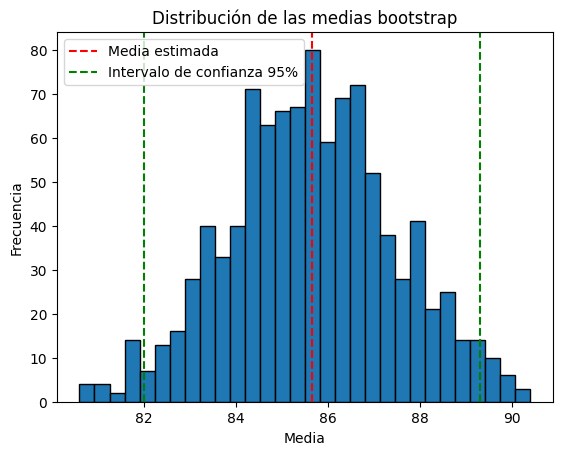

In [3]:
# Visualización de las medias bootstrap
plt.hist(bootstrap_means, bins=30, edgecolor='black')
plt.axvline(mean_estimate, color='red', linestyle='--', label='Media estimada')
plt.axvline(ci_lower, color='green', linestyle='--', label='Intervalo de confianza 95%')
plt.axvline(ci_upper, color='green', linestyle='--')
plt.title('Distribución de las medias bootstrap')
plt.xlabel('Media')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Ejercicio Propuesto

Supongamos que tienes un conjunto de datos con los tiempos (en minutos) que tarda un algoritmo de machine learning en entrenarse en 8 corridas: [12.5, 14.2, 13.1, 15.0, 11.8, 13.9, 12.0, 14.5].

Usa Bootstrapping para:

- Estimar la mediana de los tiempos de entrenamiento.
- Calcular un intervalo de confianza del 95% para la mediana.
- Graficar la distribución de las medianas bootstrap.

**Pista:** Modifica el código anterior reemplazando np.mean por np.median y usa el mismo procedimiento para generar las muestras bootstrap.

Solución Esperada:

- Escribe el código en Python.
- Reporta la mediana estimada y el intervalo de confianza.
- Genera un histograma similar al del ejemplo.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de datos en minutos en que tarda en entrenarse el algoritmo de ML
data = np.array([12.5, 14.2, 13.1, 15.0, 11.8, 13.9, 12.0, 14.5])

# Parametros de Boostrapping
n = len(data)
B = 1000
bootstrap_median = []

# Generar las muestras de boostrap y calcular la media de cada una
np.random.seed(42)
for _ in range(B):
  # Genera la muestra boostrap con reemplazo
  bootstrap_sample = np.random.choice(data, size=n, replace=True)
  # Calcula la mediana de la muestra de boostrap
  bootstrap_median.append(np.median(bootstrap_sample))

# Convertir a array para analisis
bootstrap_median = np.array(bootstrap_median)

In [5]:
# Calcular la mediana y el intervalo de confianza en percentil 2.5 y 97.5
median_estimate = np.median(bootstrap_median)
ci_lower = np.percentile(bootstrap_median, q=2.5)
ci_upper = np.percentile(bootstrap_median, q=97.5)

print(f"Mediana estimada: {median_estimate:.2f}")
print(f"Intervalo de confianza 95%: ({ci_lower:.2f}, {ci_upper:.2f})")

Mediana estimada: 13.50
Intervalo de confianza 95%: (12.00, 14.50)


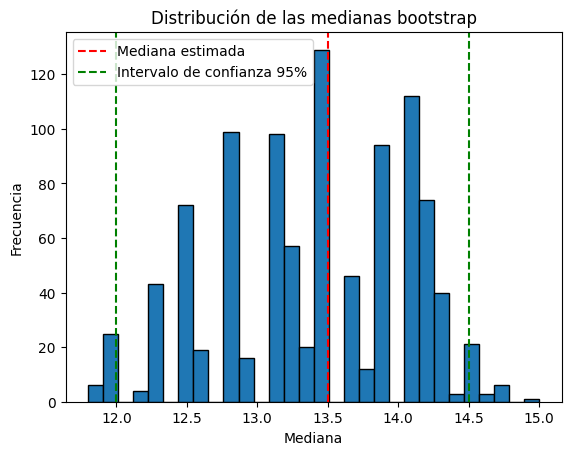

In [6]:
# Visualización de las medias bootstrap
plt.hist(bootstrap_median, bins=30, edgecolor='black')
plt.axvline(median_estimate, color='red', linestyle='--', label='Mediana estimada')
plt.axvline(ci_lower, color='green', linestyle='--', label='Intervalo de confianza 95%')
plt.axvline(ci_upper, color='green', linestyle='--')
plt.title('Distribución de las medianas bootstrap')
plt.xlabel('Mediana')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()